In [23]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras import regularizers

from keras.callbacks import History
history = History()

from keras.callbacks import EarlyStopping
stop_here_please = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

import numpy as np
import matplotlib.pyplot as plt

# Model

In [24]:
encoding_dim = 256
input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-8))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [25]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


# Load mnist Dataset

In [26]:
(x_train, _),(x_test,_) = mnist.load_data()

In [27]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
np.prod(x_train.shape[1:])

784

In [30]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit Data

In [31]:
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size = 512, shuffle = True,
              validation_data = (x_test,x_test),callbacks=[stop_here_please])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.3929 - accuracy: 0.7476 - val_loss: 0.2838 - val_accuracy: 0.7963
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2764 - accuracy: 0.7985 - val_loss: 0.2675 - val_accuracy: 0.8000
Epoch 3/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2607 - accuracy: 0.8007 - val_loss: 0.2516 - val_accuracy: 0.7996
Epoch 4/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2452 - accuracy: 0.8009 - val_loss: 0.2365 - val_accuracy: 0.8001
Epoch 5/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2315 - accuracy: 0.8011 - val_loss: 0.2238 - val_accuracy: 0.8009
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2200 - accuracy: 0.8016 - val_loss: 0.2134 - val_accuracy: 0.8017
Epoch 7/100
60000/60000 [==============================] - 5s 

Epoch 56/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1140 - accuracy: 0.8139 - val_loss: 0.1123 - val_accuracy: 0.8131
Epoch 57/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1135 - accuracy: 0.8140 - val_loss: 0.1118 - val_accuracy: 0.8131
Epoch 58/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1129 - accuracy: 0.8140 - val_loss: 0.1112 - val_accuracy: 0.8131
Epoch 59/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1124 - accuracy: 0.8141 - val_loss: 0.1107 - val_accuracy: 0.8132
Epoch 60/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1119 - accuracy: 0.8141 - val_loss: 0.1102 - val_accuracy: 0.8132
Epoch 61/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1114 - accuracy: 0.8141 - val_loss: 0.1097 - val_accuracy: 0.8132
Epoch 62/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1109 - accuracy: 0.8142

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


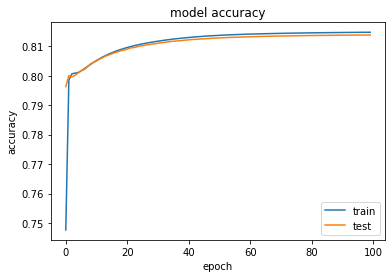

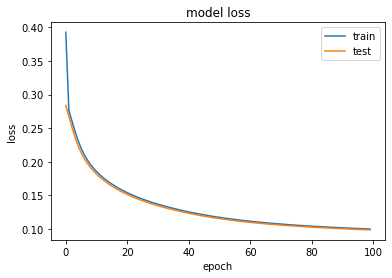

In [32]:
# Plot training loss and validation split loss over the epochs
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('sparseae_model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('sparseae_model_loss.png')
plt.savefig('sparseae_model_loss.png')
plt.show()

In [33]:
encoded_imgs = autoencoder.predict(x_test)

In [34]:
 encoded_imgs.mean()

0.13303883

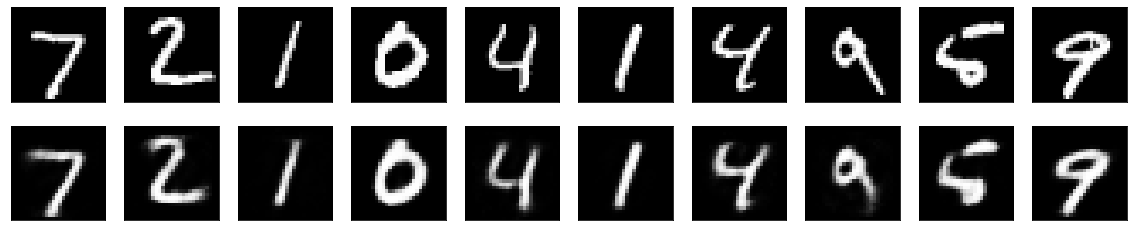

In [35]:
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()